# Oscillations

This notebook aims at applying numerical solutions to one of the most fundamental physical phenomena: oscillations. In physics, with oscillations, we intuitively mean **periodic** motion, so motion that repeats itself in time. 

For simplicity, I will consider a linear spring-mass system undergoing two types of motion: simple harmonic oscillation and damped oscillation. Since this is not a physics course, I will assume that all the _physical_ reasoning is clear and I will focus only on the numerical analysis of the ODEs.

Before using approximation methods for the solutions, I will first have a small digression on the model, so that you can follow _my_ reasoning.

## Simple Harmonic Oscillation

The typical differential equation that describes a SHO is

$$
mx'' + kx = 0
$$

with initial conditions $x(0) = x_0$ and $x'(0) = v_0$, where:
* $x$ is a function of time $t$, so $x = x(t)$, and represent the displacement from the equilibrium position (which we assume to be $0$)
* $x'$ is the velocity
* $x''$ is the acceleration towards the equilibrium position
* $m$ is the mass of the body
* $k$ is the elastic constant of the spring 

To find the solution $x(t)$ we simply write the characteristic equation $m\lambda^2 + k = 0$ and solve for $\lambda$. In this case we trivially get $\lambda^2 = -\frac{k}{m}$. Since both $k$ and $m$ are positive, we have that $-\frac{k}{m} < 0$ so that $\lambda = \pm i \sqrt{\frac{k}{m}}$. Letting $\omega = \sqrt{\frac{k}{m}}$ we get the general solution $x(t) = c_1\cos(\omega t) + c_2\sin(\omega t)$. Plugging in the initial conditions we get the particular solution

$$
x(t) = x_0 \cos(\omega t) + \frac{v_0}{\omega}\sin(\omega t)
$$

To analyze the system in its phase plane we get the following system of equations
$$
\begin{cases}
x_1' = x_2\\
x_2' = -\frac{k}{m}x_1
\end{cases}
$$

where in this case the displacement is represented by $x_1$ while the velocity $v$ by $x_2 = x_1'$. To study the trajectory in the $(x,v)$ plane we notice that the representative matrix is
$$
A = 
\begin{bmatrix}
0 && 1 \\
-\frac{k}{m} && 0
\end{bmatrix}
$$
where $tr(A) = 0$ and $det(A) = \frac{k}{m}$. Since $\Delta = tr(A) - 4det(A) < 0 $ we get that the trajectories are neutrally stable centres around the origin. 
Moreover from the fact that $v(t) = x'(t)$ we easily recover that $v(t) = v_0\cos(\omega t) -x_0\omega\sin(\omega t)$. Let's visualize it with the following values: $k = m = x_0 = 1$ and $v_0 = 0$

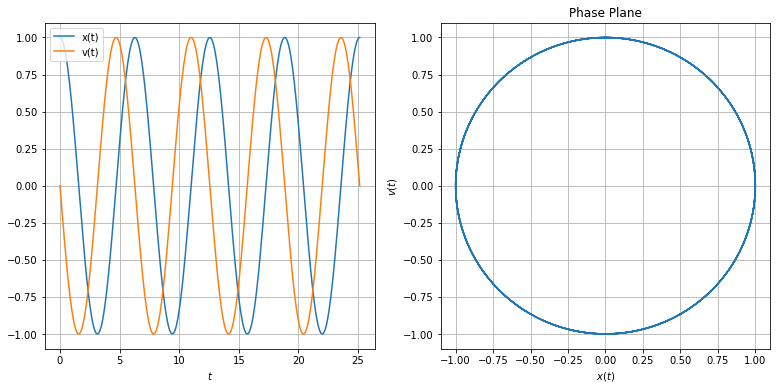

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot(t, x, v):
    """
    TBA
    """
    
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    
    # x(t) and v(t)
    ax[0].plot(t, x, label = "x(t)")
    ax[0].plot(t, v, label = "v(t)")
    ax[0].set(xlabel = "$t$")
    ax[0].legend()
    ax[0].grid()
    # phase plane
    ax[1].plot(x, v)
    ax[1].set(xlabel = "$x(t)$", ylabel = "$v(t)$", title = "Phase Plane")
    ax[1].grid()

    plt.show()

m = 1
k = 1
x0 = 1
v0 = 0
omega = np.sqrt(k / m)
T = 8 * np.pi
time = np.linspace(0, T, 350)
x = x0 * np.cos(omega * time) + (v0 / omega) * np.sin(omega * time)
v = v0 * np.cos(omega * time) - (x0 * omega) * np.sin(omega * time)

plot(time, x, v)

Now we want to simulate the system using Euler's method and we will indeed use the representatvie matrix.

Recall that Euler's approximation is given by $x_{n+1} = x_n + hf(t,x)$ where $t \in \{ nh : n = 0, 1, \dots\}$ for a fixed step size $h > 0$ and the original problem is of the type $x' = f(t,x)$.

In our case the system is autonomous, so time independent. This means that for $\bar{x} \in \mathbb{R} ^ 2$ we have $\bar{x}' = f(t, \bar{x}) = f(\bar{x}) = A \bar{x}$.
So we get $\bar{x}_{n+1} = \bar{x}_n + hA\bar{x}_n$, from which we recover a new general formula for high-dimensional cases

$$
\bar{x}_{n+1} = (I + hA)\bar{x}_n
$$

where $I$ is the identity matrix. So the problem becomes

$$
\begin{cases}
\bar{x}_{n+1} = (I + hA)\bar{x}_n \\
\bar{x}_0 = b
\end{cases}
$$

where $b$ is the vector of initial coniditions of the linear system. Let's see how the approximation works.

In [2]:
from math import floor
def euler(A, b, T, t0, h):
    """
    High-dimensional Euler Method
    
    Parameters:
        A (np.array): the representative matrix
        b (np.array): the vector of initial conditions (must match dimensions with A)
        T (float or int): final time
        t0 (int): initial time
        h (float): step-size
    
    Returns:
        time (np.array): it includes all the recursive time steps
        y_approx (np.array): it includes all evaluations of the sequence
    """
    
    # checking dimensions are correct
    if A.shape[0] != A.shape[1] or A.shape[0] != b.shape[0]:
        raise Exception("Dimensions of matrix and vector must match")
    
    n = floor((T - t0) / h) # number of steps
    approx = np.zeros((len(b), n)) #(n. rows, n.columns)
    time = np.zeros(n)
    approx[0,0] = b[0] #initial position
    approx[1,0] = b[1] #initial velocity
    time[0] = t0
    
    
    dim  = A.shape[0]
    iden = np.identity(dim)
    mat = iden + h * A
    #print(approx.shape)
    for i in range(n - 1):
     #   print(approx[:, i  + 1])
        approx[:, i + 1] = np.dot(mat, approx[:, i])
     #   print(approx[:, i + 1])
        time[i + 1] = time[i] + h
    return time, approx

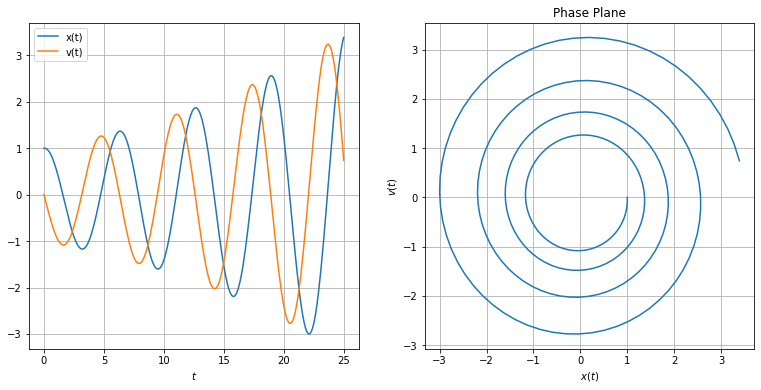

In [3]:
# constant (some of them were already defined above)
A = np.array([[0, 1],[- k / m, 0]])
b = np.array([[x0], [v0]])
t0 = 0
h = 0.1

time, approximation = euler(A, b, T, t0, h)

x_approx = approximation[0] # approximation of displacement
v_approx = approximation[1] # approximation of velocity

plot(time, x_approx, v_approx)

As we can see using a standard Euler method the trajetories are unstable. In addition one of the most fundamental principles of physics is violated: conservation of energy.

Indeed, we know that the total energy of the system is $E$ is constant and that the kinetic energy is $K = \frac{1}{2}mv^2$ and is the potential energy is $U = \frac{1}{2}kx^2$. Since we know the analytical values of both $x$ and $v$ we easily guess that $E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2 = \frac{1}{2}kA^2$ where $A$ is the amplitude in the $(x,t)$ graph.

In the correct solution, the amplitude is always constant, meaning that the energy is conserved. However in the approximated solution we can see that the amplitude is increasing over time, meaning that the as the mass moves, it gains more velocity, and therefore more energy.

This is enough for us to show that Euler's method is unstable and results in non-conservative energy. To fix this issue we could use the **sympletic Euler** method. I'll add it later on since it requires some further explanations.

## Damped Oscillation

What happens if we introduce friction, so a non-conservative force, to the system? In a vibrating system, we can define the frictional force as $F_f = -\gamma m v$, where $\gamma > 0$ is the damping, or frictional, constant.

*NOTE: the assumption of a constant damping coefficient is quite strong, as in real life the friction is never the same. However, this is just a model, and models are by definition approximations.*

Therefore we get that the equations that describes the motion is
$$
x'' + \gamma x' +\omega ^ 2 x = 0
$$
where I recall that $\omega = \sqrt{\frac{k}{m}}$. In this case, the solutions are given by $\lambda ^ 2 + \gamma\lambda + \omega ^2 = 0$. So we have $\lambda_{1,2} = \frac{-\lambda \pm \sqrt{\gamma^2 - 4\omega}}{2}$. So we must construct three cases:

* 1) $\sqrt{\gamma^2 - 4\omega} > 0 \implies \gamma > 2\omega$

Here the system is *overdamped*, that is there is lots of friction. In this case the solutions are real numbers and the system exponentially decayes to the steady state **without oscillation**. The solution is given by *TBA*
* 2) $\sqrt{\gamma^2 - 4\omega} = 0 \implies \gamma = 2\omega$

Here the system is *critically damped*, so the system returns to the steady state as fast as possible. The solution is given by *TBA*
* 3) $\sqrt{\gamma^2 - 4\omega} < 0 \implies \gamma < 2\omega$

Here the system is *underdamped*, hence there is small friction, or better, the elasticity exceed the friction. Here the solutions to the characteristic equation are complex. Thereofore, the system oscillates with amplitudes that are exponentially decreasing to 0. The solution is given by *TBA*